# Statistics and Scientific Research
Various parts of statistics and the connections between them make much more sense when you understand how it is used in the context of scientific research. The goal of the scientific research is to explain _why_ something happens.

 1. Research starts with some observation. The observation should be confirmed by some data you collect in addition to your initial observation.
 2. You create a **theory** that explains what you have initially observed.
 3. The theory is further used to **make predictions** (hypotheses) about an outcome. Predictions should be **verifiable**, i.e. we should be able to measure something in order to support or falsify a prediction.
 The predictions are expressed in terms of a **cause** and an **outcome**. The cause (predictor variable / independent variable) is the variable that the experimenter modifies. The outcome variable (dependent variable) is believed to the caused by the predictor variable.
 4. You collect data to verify that the prediction is true. Actually you can't say that the prediction is true based on the collected data (_because you can't collect all the possible data and prove that all other hypotheses are false_). Instead you create a "contrarian" prediction and try to show that the probability of the data you collected is very small if contrarian prediction is true (by convention if the probability is < 0.05 we can claim that the contrarian prediction is false and thus the initial/experimental prediction is probably true). The contrarian prediction is called **null hypothesis**.
 5. You analyse the data. Analysis is done first looking at the data graphically and by fitting a statistical model to it.

### Types of variables

<div class='alert alert-danger'>
    <ul>
        <li> Which statistical methods (e.g. summarization techniques) can be applied for which kinds of variables ?
    </ul>
</div>

> Variables themselves can be classified based on whether they can be represented by numerical quantities. 
>
>  * **Categorical variables** - the variable represents a distinct class or entity to which the measured entity can belong. A category can be represented by a number but the number itself doesn't have an absolute value, it is just an identifier. 
>    * **Nominal variable** - The value of the variable is used only to identify the variable. No relationships between values can be made (except equality). The value, even if is a number, doesn't represent a numeric quantity.
>    * **Binary variable** - special case of nominal variable with only 2 categories.
>    * **Ordinal variables** - nominal variable with the additional property that categories can be arranged in a specific order, e.g. grades of various kinds. In general any subjective score reported by a human is an ordinal variable since it is a relative assessment of the thing being measured. Note that scores can be numbers on some scale or categories themselves (e.g. bad, satisfactory, good, very good).
>  * **Numerical variables** - can be variables with exact values (discrete variables) and values taken from a an infinite continuum of values (continous variables). Put another way, if we have a finite numerical interval, a discrete variable can take a finite number of values in that interval whereas a continuous variable - infinite number of values. In the case of the continuous variables the precision of the value is determined by the precision and resolution of the measuring device. For practical purposes continuous variables are approximated to some precision so they become discrete. For numerical variables we distinguish 3 subtypes with increasing number of relationships between values:
>     * **Interval variables** - ordinal variables with the addition that the equal differences between 2 values represent equal changes in the property of the variable. There exists a smallest difference between 2 values which we call the unit of measure (that distinguishes 2 successive values). A good example of interval variables are dates.
>     * **Ratio variables** - interval variables with a meaningful zero value that represents the absence of the quantity being measured. Length, weight are good examples. The variables in this category have also meaningful ratios. Dates are not a ratio variable because the ratio of dates makes no sense, also we don't have an absolute date of "0".

### Types of research methods

Based on the role of the experimenter in the research we distinguish 2 types of research methods:

<div class='alert alert-warning'>
Add more information about the relationship between scientific research and statistics, in particular:
    <ul>
        <li> <em>Q: What kind of statistical techniques are applied in correlational research vs experimental ?</em>
        <li> A: Statistical techniques are not divided by this criteria.
    </ul>
</div>

1. Correlational research - the experimenter only observes what has already happened and tries to find correlations between different variables. Correlation only means that variables tend to vary together in some way, not necessarily the change in one being the cause of the change in the other. However the end goal is to predict the value of some variables given the value of another variable. 
<div class='alert alert-danger'>
    What does statistics say about when can we state that one variable reliably predicts the values of another one (rather than the data we collect happening purely by chance) ? How many times observations of co-occurence we need to collect ? How many values should the predictor variable have vs the outcome variable ? 
</div>
2. Experimental research - the experimenter tries to show that changes in the predictor variable actually causes the changes in outcome variable.

> **Causality** implies the following:
>   * If the cause happens the outcome should also happen
>   * The outcome happens _close in time after_ the cause
>   * If the cause doesn't happen the outcome is absent too

In experimental research we do an experiment where the cause is present and we observe whether the outcome is present too and another experiment where the cause is absent and we observe whether the outcome is also absent.
Such experiments can be run in 2 ways:
* Run each of the 2 experiments with different participants. The difficulty here is to make sure the difference in experiment outcomes comes _mainly_ from the manipulation of the cause (**systematic variation**) rather than the difference in the 2 groups of participants (**unsystematic variation**). 
<div class='alert alert-danger'>
    <ul>
        <li> <em>Q: How does statistics measure the change in the outcome (when cause is present vs absent)?</em>
        <li> <em>Q: How much change is considered statistically significant ?</em>
        <li> <em>Q: How does statistics quantify how much change is due to systematic variation vs unsystematic variation ?</em>
    </ul>
</div>
* Run each of the 2 experiments with the same number of participants. The participants are again split in 2 groups though, one group does the experiments in one order and the other in another order.

# Basic Analysis Constructs

In [3]:
library('ggplot2')
library('e1071')
options(repr.plot.width=6, repr.plot.height=3)
options(digits=4)

### Frequency Distribution

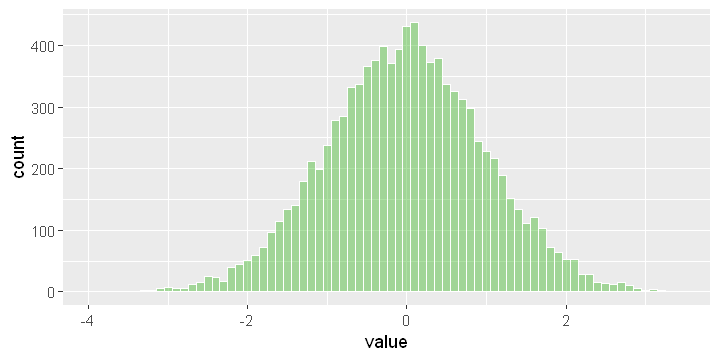

In [4]:
x <- rnorm(10000)
d <- data.frame(value=x)
ggplot(d, aes(x=value)) + geom_histogram(binwidth=0.1, color="white", fill=rgb(0.2,0.7,0.1,0.4))

In [126]:
sd_d <- sd(x)
cat(sprintf('Std. dev=%.4f\n', sd_d))
cdf <- ecdf(x)
values <- c(min(x), -3 * sd_d, -2 * sd_d, -1 * sd_d, 0 * sd_d, 1 * sd_d, 2 * sd_d, 3 * sd_d, max(x))
cat(sprintf('Prob(x < %5.2f) = %.4f\n', values, cdf(values)), sep='')
special_z_scores <- c(1.96, 2.58, 3.29)
cat(sprintf('Prob(%5.2f < x < %5.2f) = %.2f%%\n', -special_z_scores, special_z_scores, 100 * (cdf(special_z_scores) - cdf(-special_z_scores))), sep='')

Std. dev=0.9904
Prob(x < -3.87) = 0.0001
Prob(x < -2.97) = 0.0022
Prob(x < -1.98) = 0.0246
Prob(x < -0.99) = 0.1596
Prob(x <  0.00) = 0.5068
Prob(x <  0.99) = 0.8459
Prob(x <  1.98) = 0.9777
Prob(x <  2.97) = 0.9991
Prob(x <  3.40) = 1.0000
Prob(-1.96 < x <  1.96) = 95.11%
Prob(-2.58 < x <  2.58) = 98.96%
Prob(-3.29 < x <  3.29) = 99.94%


### Measures of Deviation from Normal Distribution

In [77]:
cat(sprintf('%-12s=%.4f', 'skew', e1071::skewness(d$value)), '\n')  # left/right (positive/negative) tail asymmetry
cat(sprintf('%-12s=%.4f', 'kurtosis', e1071::kurtosis(d$value)), '\n') # center/tails deviation (negative-> flatter tails, positive -> higher distribution in the center)

skew        =-0.0110 
kurtosis    =0.0337 


### Center of Distribution

In [78]:
d2 <- c(3, 3, 6, 100, 5, 9, 1, 9, 7, 8, 3, 9, 2, 4);
ux <- unique(d2);  # get unique values in the set
tab <- tabulate(match(d2, ux));  # match - returns the indexes in ux for each element of x, tabulate - counts the frequencies of values in an vector of integers
mode <- ux[tab == max(tab)];  # returns elements in ux at positions where the highest frequency matches

cat(sprintf('%12s=%.4f (repeated %d times)', 'mode', mode, max(tab)), '\n')
cat(sprintf('%12s=%.4f (sorted=%s) size=%d', 'median', median(d2), paste(sort(d2), collapse=' '), length(d2)), '\n')
cat(sprintf('%12s=%.4f', 'mean', mean(d2)), '\n')

        mode=3.0000 (repeated 3 times)         mode=9.0000 (repeated 3 times) 
      median=5.5000 (sorted=1 2 3 3 3 4 5 6 7 8 9 9 9 100) size=14 
        mean=12.0714 


The mean is affected by the presence of outliers. Median and mode - not.

### Dispersion in a Distribution

In [79]:
d2 <- c(22, 40, 53, 57, 93, 98, 103, 108, 116, 121, 252)

In [80]:
range(d2)
c(min(d2), max(d2))

[1]  22 252

[1]  22 252

In [81]:
q5 <- quantile(d2, type=1) # default is type=7
q5

0%  25%  50%  75% 100% 
  22   53   98  116  252

In [86]:
IQR(d2, type=1)
cat(q5[4]-q5[2])

[1] 63

63

In [90]:
scale(d2)  # computing the z-scores for a distribution 

-1.21808
-0.92432
-0.71216
-0.64688
-0.05935
0.02225
0.10386
0.18546
0.31602
0.39762
2.53557


Having the distribution, the mean and the standard deviation we could move on to compute the probabilty that a given value would occur in that distribution. Of course to do that we need to assume a certain distribution of scores first, e.g. assume that the samples follow a normal distribution. We would then use the precomputed tables for that distribution (a mapping from values to probabilities) to compute the cumulative probability of occurrence of a value of that magnitude or smaller.

In [118]:
sample_value <- 9
# mean and stddev should have been of the population
z <- (sample_value - mean(d2)) / sd(d2)
cat(
    sprintf(
        paste(
            'Assuming a normal distribution in the underlying population for the sample [%s],',
            'the probability of obtaining a value of %d or more would be %.2f%%',
            sep=' '
        ), 
        toString(d2), 
        sample_value, 
        100 * pnorm(z, lower.tail=FALSE), '\n'
    )
)

Assuming a normal distribution in the underlying population for the sample [22, 40, 53, 57, 93, 98, 103, 108, 116, 121, 252], the probability of obtaining a value of 9 or more would be 92.37%